In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

pd.options.display.max_colwidth = 200

In [94]:
df = pd.read_csv('tweet_emotions .csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


# EDA

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [96]:
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [97]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [98]:
emotion_count = df['sentiment'].nunique()
emotion_count

13

There is a total of 13 emotions to process

# Preprocessing

In [99]:
df.drop(columns=['tweet_id'], inplace=True) # No valuable information

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment']) # encoding sentiments to numeric values

Converting to dictionaries for future conversions

In [102]:
class_to_index = {i: label for i, label in zip(le.classes_, range(0, len(le.classes_)))}
index_to_class = {label: i for i, label in class_to_index.items()}
class_to_index, index_to_class

({'anger': 0,
  'boredom': 1,
  'empty': 2,
  'enthusiasm': 3,
  'fun': 4,
  'happiness': 5,
  'hate': 6,
  'love': 7,
  'neutral': 8,
  'relief': 9,
  'sadness': 10,
  'surprise': 11,
  'worry': 12},
 {0: 'anger',
  1: 'boredom',
  2: 'empty',
  3: 'enthusiasm',
  4: 'fun',
  5: 'happiness',
  6: 'hate',
  7: 'love',
  8: 'neutral',
  9: 'relief',
  10: 'sadness',
  11: 'surprise',
  12: 'worry'})

In [103]:
df

,sentiment,content
0,2,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,10,Layin n bed with a headache ughhhh...waitin on your call...
2,10,Funeral ceremony...gloomy friday...
3,3,wants to hang out with friends SOON!
4,8,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
...,...,...
39995,8,@JohnLloydTaylor
39996,7,Happy Mothers Day All my love
39997,7,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!"
39998,5,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!


In [104]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import unidecode
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [106]:
def clean_text(text):
    #Removing URLs
    text = re.sub('((www.[^s]+)|(https?:\/\/.*?[\s+]))',' ', text)
    #Removing mentions
    text = re.sub('@[\w]*',' ', text)

    # Remove special characters and numbers
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r',+', ', ', text)
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    text = unidecode.unidecode(text)  # removing accents
    return text

def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

lemmatizer = WordNetLemmatizer()
def simple_lemmatizer(text):
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [107]:
df['content_clean'] = df['content'].apply(clean_text)
df['content_clean'] = df['content_clean'].apply(remove_stopwords)   # removing stopwords
df['content_clean'] = df['content_clean'].apply(simple_lemmatizer)  # applying word lemmatizer for consistency

In [108]:
df.head(30)

,sentiment,content,content_clean
0,2,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,know listenin bad habit earlier started freakin part
1,10,Layin n bed with a headache ughhhh...waitin on your call...,layin n bed headache ughhhh waitin call
2,10,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,3,wants to hang out with friends SOON!,want hang friend soon
4,8,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",want trade someone houston ticket one
5,12,Re-pinging @ghostridah14: why didn't you go to prom? BC my bf didn't like my friends,repinging didnt go prom bc bf didnt like friend
6,10,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",sleep im thinking old friend want he married damn amp want scandalous
7,12,Hmmm. http://www.djhero.com/ is down,hmmm
8,10,@charviray Charlene my love. I miss you,charlene love miss
9,10,@kelcouch I'm sorry at least it's Friday?,im sorry least friday


# Feature Extraction

In [109]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

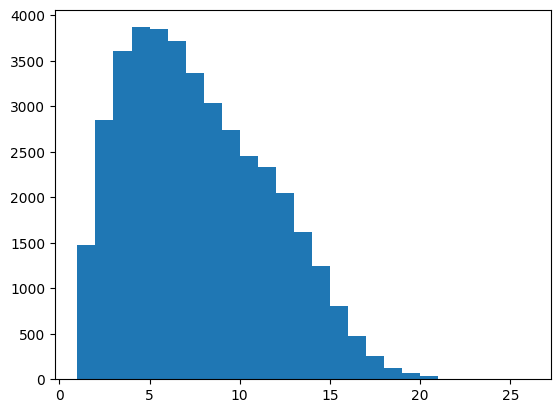

In [110]:
lengths = [len(t.split(' ')) for t in df['content_clean']]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

The appropriate max words per sentence seems to be 20

In [111]:
maxlen = 20
vocab_size = 30000  # total number of word count was found to be just above 30000

In [112]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")   # initialize tokenizer with an out of vocabulary token
tokenizer.fit_on_texts(df['content_clean'])                      # fit on the cleaned tweets data

word_index = tokenizer.word_index
vocab_size = len(word_index)

In [119]:
def get_seqeuences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)                  # converting each sentence to tokenized numeric sequences
  padded = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen) # post padding- fill with zeroes to the end & post truncate would truncate larger than maxlen at the end
  return padded

In [120]:
padded_tweets = get_seqeuences(tokenizer, df['content_clean'])

In [121]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(padded_tweets, df['sentiment'], test_size=0.2, random_state=134) #splitting train and test data with 80:20 ratio

# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, GlobalAveragePooling1D, Flatten, Dropout
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

Bidirectional LSTM Architecture with softmax activated output layer for multiclass classification

In [126]:
model = Sequential()  # model with layers added sequentially
model.add(Embedding(vocab_size, 16, input_length = maxlen, embeddings_regularizer=l2(0.01)))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(32, activation = "relu", kernel_regularizer=l2(0.02)))
model.add(Dropout(0.5))      # dropout layer to prevent overfitting
model.add(Dense(emotion_count, activation = "softmax"))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 16)            481712    
                                                                 
 bidirectional_22 (Bidirecti  (None, 20, 40)           5920      
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 40)               9760      
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 32)                1312      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 13)              

Compiling with sparse categorical crossentropy because outputs are label encoded, evaluation policy is accuracy and optimizer is Adam.
Also added an early stopping callback to prevent overfitting and also return best results

In [127]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/50
1000/1000 [==============================] - 20s 14ms/step - loss: 2.3513 - accuracy: 0.2153 - val_loss: 2.1464 - val_accuracy: 0.2520
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 2.1795 - accuracy: 0.2373 - val_loss: 2.1569 - val_accuracy: 0.2414
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 2.1788 - accuracy: 0.2424 - val_loss: 2.1249 - val_accuracy: 0.2491
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 2.1443 - accuracy: 0.2530 - val_loss: 2.0906 - val_accuracy: 0.2570
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 2.1224 - accuracy: 0.2674 - val_loss: 2.0755 - val_accuracy: 0.3091
Epoch 6/50
1000/1000 [==============================] - 11s 11ms/step - loss: 2.1063 - accuracy: 0.2927 - val_loss: 2.0622 - val_accuracy: 0.3027
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 2.0914 - accuracy: 0.2984 - val_loss: 2.0426 -

In [128]:
score = model.evaluate(x_test, y_test)[1]
print("Accuracy score in percentage : " + str(round(score * 100, 2)) + "%")

250/250 [==============================] - 1s 5ms/step - loss: 2.0238 - accuracy: 0.3450
Accuracy score in percentage : 34.5%


Trying a simpler Flatten/ 1D Pooling architecture

In [138]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 16, input_length = maxlen, embeddings_regularizer=l2(0.01)))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(emotion_count, activation = 'softmax'))
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 20, 16)            481712    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_32 (Dense)            (None, 13)                221       
                                                                 
Total params: 481,933
Trainable params: 481,933
Non-trainable params: 0
_________________________________________________________________


In [139]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=80, callbacks=[EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/80
1000/1000 [==============================] - 5s 3ms/step - loss: 2.2848 - accuracy: 0.2204 - val_loss: 2.1601 - val_accuracy: 0.2185
Epoch 2/80
1000/1000 [==============================] - 3s 3ms/step - loss: 2.1614 - accuracy: 0.2361 - val_loss: 2.1509 - val_accuracy: 0.2320
Epoch 3/80
1000/1000 [==============================] - 4s 3ms/step - loss: 2.1550 - accuracy: 0.2425 - val_loss: 2.1460 - val_accuracy: 0.2344
Epoch 4/80
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1507 - accuracy: 0.2441 - val_loss: 2.1419 - val_accuracy: 0.2393
Epoch 5/80
1000/1000 [==============================] - 3s 3ms/step - loss: 2.1477 - accuracy: 0.2448 - val_loss: 2.1394 - val_accuracy: 0.2438
Epoch 6/80
1000/1000 [==============================] - 3s 3ms/step - loss: 2.1455 - accuracy: 0.2461 - val_loss: 2.1388 - val_accuracy: 0.2393
Epoch 7/80
1000/1000 [==============================] - 4s 4ms/step - loss: 2.1441 - accuracy: 0.2474 - val_loss: 2.1361 - val_accuracy:

In [140]:
score2 = model2.evaluate(x_test, y_test)[1]
print("Accuracy score in percentage : " + str(round(score2 * 100, 2)) + "%")

250/250 [==============================] - 1s 2ms/step - loss: 2.0569 - accuracy: 0.2920
Accuracy score in percentage : 29.2%


# Model evaluation

It is found that with regularizers, the training progress is slow and without regularizers, the models are heavily overfitting. Further preprocessing needed, need to train for hundreds of epochs at low learning rates, and higher regularizers values
Model 1 architecture is found to perform better